In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import quandl
from bs4 import BeautifulSoup
import os
import datetime

sns.set()
%matplotlib inline

In [2]:
resp = requests.get("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")
soup = BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', class_='wikitable sortable')

In [3]:
tickers = []
for row in table.find_all('tr')[1:]: # the first is the header
    ticker = row.find_all('td')[2]   # exchange and co. precedes ticker
    tickers.append(ticker.get_text())

In [4]:
tickers

['MMM',
 'AXP',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DWDP',
 'XOM',
 'GE',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'VZ',
 'V',
 'WMT',
 'DIS']

In [5]:
if os.path.exists('DJIA_Data'):
    print("Directory already exists")
else:
    os.mkdir('DJIA_Data') # make a directory for the data
    print("Created Directory: 'DJIA_Data'")

Directory already exists


In [6]:
# shows that the data from quandl is a pandas dataframe
data = quandl.get("WIKI/{}".format('MMM'))
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# collect all the data we can for each company from quandl
for i in tickers:
    df = quandl.get('WIKI/{}'.format(i))
    df.to_csv(r'DJIA_Data\{}.csv'.format(i))
    print(str(i)+'.csv created') 

MMM.csv created
AXP.csv created
AAPL.csv created
BA.csv created
CAT.csv created
CVX.csv created
CSCO.csv created
KO.csv created
DWDP.csv created
XOM.csv created
GE.csv created
GS.csv created
HD.csv created
IBM.csv created
INTC.csv created
JNJ.csv created
JPM.csv created
MCD.csv created
MRK.csv created
MSFT.csv created
NKE.csv created
PFE.csv created
PG.csv created
TRV.csv created
UNH.csv created
UTX.csv created
VZ.csv created
V.csv created
WMT.csv created
DIS.csv created


In [9]:
df = pd.read_csv(r"DJIA_Data\MMM.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1970-01-02,109.62,110.25,109.50,109.62,4500.0,0.0,1.0,2.927425,2.944250,2.924221,2.927425,72000.0
1,1970-01-05,109.75,110.38,109.75,110.25,27900.0,0.0,1.0,2.930897,2.947721,2.930897,2.944250,446400.0
2,1970-01-06,110.25,111.38,110.12,111.38,11000.0,0.0,1.0,2.944250,2.974427,2.940778,2.974427,176000.0
3,1970-01-07,111.38,112.25,111.12,112.00,10300.0,0.0,1.0,2.974427,2.997660,2.967483,2.990984,164800.0
4,1970-01-08,112.00,113.75,111.75,113.50,19000.0,0.0,1.0,2.990984,3.037718,2.984307,3.031042,304000.0


In [10]:
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

In [11]:
df.Date = pd.to_datetime(df.Date)

In [12]:
df.dtypes # shows that above function changes the Date to datetime object

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Ex-Dividend           float64
Split Ratio           float64
Adj. Open             float64
Adj. High             float64
Adj. Low              float64
Adj. Close            float64
Adj. Volume           float64
dtype: object

In [13]:
# we want the adjusted closes for each company in one DataFrame
df_main = pd.DataFrame()
for i in tickers:
    df = pd.read_csv(r'DJIA_Data\{}.csv'.format(i))  # creates DataFrame from the csv file
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True) # to join we need common indecis
    df.rename(columns={'Adj. Close': i}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
    if df_main.empty:  # if its empty this statement returns True
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')  # ensure that we do not lose any data with 'outer'

In [14]:
df_main.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,0.871816,1.578370,NaN,NaN,0.262323,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141259
1962-01-03,NaN,NaN,NaN,0.889252,1.593539,NaN,NaN,0.256479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155
1962-01-04,NaN,NaN,NaN,0.880534,1.634945,NaN,NaN,0.258427,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155
1962-01-05,NaN,NaN,NaN,0.863098,1.650114,NaN,NaN,0.252583,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143648
1962-01-08,NaN,NaN,NaN,0.865190,1.660363,NaN,NaN,0.249986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155


In [15]:
df_main.reset_index(inplace=True)
df_main.head(2)

,Date,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
0,1962-01-02,NaN,NaN,NaN,0.871816,1.578370,NaN,NaN,0.262323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141259
1,1962-01-03,NaN,NaN,NaN,0.889252,1.593539,NaN,NaN,0.256479,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155


In [16]:
df_main = df_main[df_main.Date > datetime.datetime(1999, 12, 31)] # boolean indexing

In [17]:
df_main.head(2)
df_main.to_csv("DJIA_co_data_since2000.csv") # saves time in case you want to load it into another script

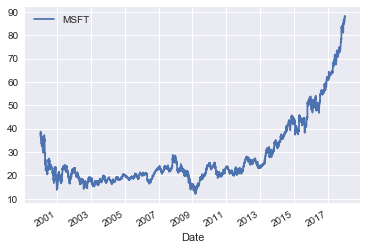

In [18]:
df_main.plot(x='Date', y='MSFT')

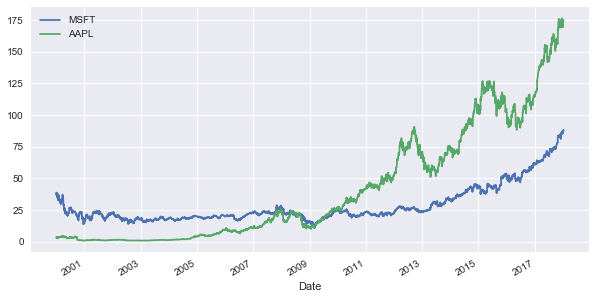

In [19]:
# plotting columns against one another with date as index
df_main.set_index('Date', inplace=True) 
df_main[['MSFT', 'AAPL']].plot(figsize=(10,5))

In [20]:
type(df_main[['MSFT', 'AAPL']]) # shows that >1 series together is a dataframe

pandas.core.frame.DataFrame

In [21]:
type(df_main['MSFT']) # 1 column and index means series

pandas.core.series.Series

In [22]:
# Correlation Table for all the companies
# dates have to be set as index for this which they were set in previous 'In'
df_main_corr = df_main.corr()

In [23]:
df_main_corr.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
MMM,1.000000,0.870924,0.953348,0.957678,0.820551,0.836818,0.255677,0.925253,0.698543,0.788979,...,0.959117,0.767587,0.938683,0.768138,0.968801,0.930004,0.910925,0.983558,0.891157,0.952289
AXP,0.870924,1.000000,0.865408,0.884942,0.839641,0.848536,0.343942,0.868176,0.753035,0.800219,...,0.847667,0.745994,0.872639,0.810081,0.827555,0.912778,0.871884,0.833023,0.866055,0.887032
AAPL,0.953348,0.865408,1.000000,0.919704,0.867614,0.890946,0.286608,0.962963,0.327912,0.827213,...,0.957864,0.739448,0.929461,0.643551,0.917660,0.936314,0.931818,0.949164,0.924094,0.947127
BA,0.957678,0.884942,0.919704,1.000000,0.836320,0.805526,0.360514,0.867461,0.683217,0.751905,...,0.893398,0.754538,0.883684,0.712855,0.959552,0.891394,0.854927,0.951468,0.850646,0.901834
CAT,0.820551,0.839641,0.867614,0.836320,1.000000,0.939570,0.109759,0.857823,0.710206,0.900343,...,0.799144,0.467149,0.902273,0.760273,0.789352,0.926156,0.794162,0.688352,0.799445,0.758487


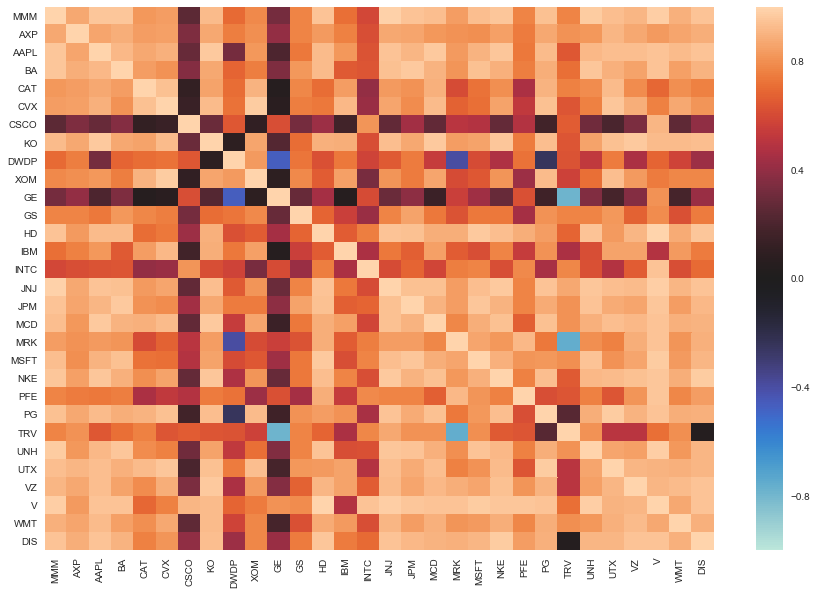

In [24]:
#using seaborn for heatmap
plt.figure(figsize=(15,10)) # change the figure size
sns.heatmap(df_main_corr, center=0, vmin=-1, vmax=1) 